## Дерево отрезков

Дерево отрезков - структура данных, позволяющая выполнять многие операции с отрезками массива за $O(\log N)$. Дерево отрезков - универсальная структура данных, для которой можно реализовать неограниченный набор операций (иногда за большую сложность: $O(\log^2 N)$). Самая простая версия дерева отрезков позволяет находить сумму или минимум на отрезке, и изменять отдельные элементы.

## Построение дерева отрезков
Дерево отрезков - полное бинарное дерево, в котором каждая вершина отвечает за некоторый отрезок в массиве. Корень дерева отвечает за весь массив, его две дочерних вершины - за две половины, и так далее. У каждой вершины, отвечающей за отрезок длиной больше 1, есть две дочерних вершины, отвечающих за левую и правую половины этого отрезка. Листья дерева отрезков отвечают за отдельные элементы (отрезки длиной 1).

Пример для массива из 8 элементов:
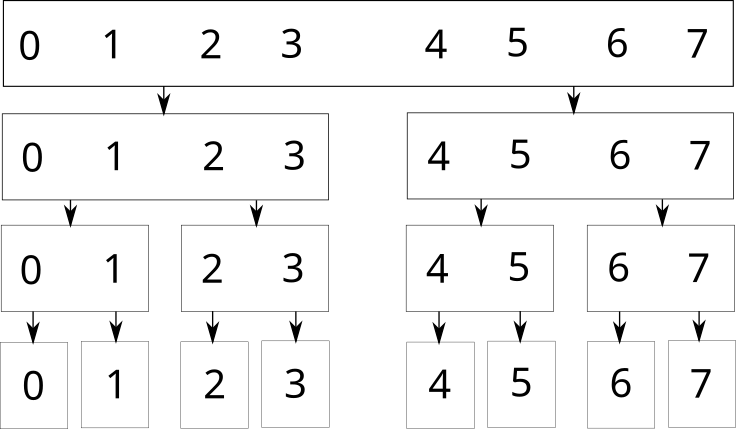

Каждый прямоугольник - вершина дерева отрезков. Если некоторая вершина отвечает за отрезок нечётной длины, то одна из её дочерних вершин будет отвечать за отрезок длиной $⌈\frac{n}{2}⌉$, а другая - за отрезок длиной $⌊\frac{n}{2}⌋$. Например, так выглядит дерево отрезков для массива из 13 элементов:

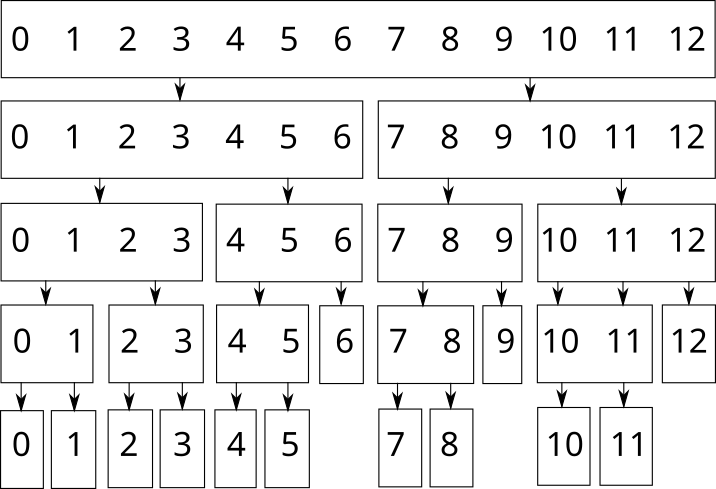

Для массива из n элементов дерево отрезков имеет около $2n$ вершин $(n+n/2+n/4+\dots)$, а его высота равна порядка $\log n$.

Главное свойство дерева отрезков, на котором и строятся все алгоритмы работы с ним: __любой непрерывный отрезок в массиве из $\mathbf{n}$ элементов можно представить с помощью около $\mathbf{2\ log\ n}$ вершин в дереве отрезков.__

Например, отрезок $[1;11]$ в массиве длины 13 можно представить с помощью следующих вершин:

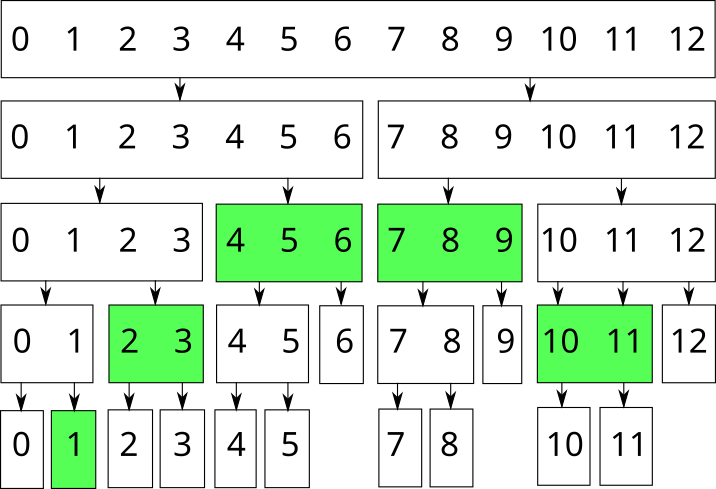

## Дерево отрезков для поиска суммы
Одна из простейших функций, которую можно считать за $O(\log N)$ с помощью дерева отрезков - __сумма.__

При построении дерева в каждой его вершине сохраним сумму на соответствующем отрезке (построение будет вестись рекурсивно, поэтому достаточно просто сложить суммы на двух дочерних отрезках). Затем каждый запрос суммы на отрезке будем разбивать на $2\log N$ отрезков, и находить сумму на каждом из них за $O(1)$, используя предпросчитанные значения. Таким образом сложность запроса суммы равна $O(\log N)$.

Кроме запросов суммы к дереву отрезков также могут поступать запросы на изменение отдельных элементов (модификацию). Заметим, что от изменения одного элемента значение суммы изменится в одной вершине на каждом уровне дерева отрезков (в которую входит этот элемент). Рекурсивно пересчитаем значения суммы только в этих вершинах. Таким образом сложность запроса модификации равна высоте дерева, или $O(\log N)$.

Для реализации запроса суммы и запроса модификации обход дерева реализуется с помощью одного и того же алгоритма, основанного на DFS. Пусть границы нашего запроса $[L;R]$ (в случае запроса модификации $L=R$), а границы отрезка, соответствующего текущей вершине $[TL;TR]$. В зависимости от взаимного положения этих границ, существуют три варианта действий алгоритма:
 - *Текущий отрезок полностью входит в запрос $(L\le TL;TR\le R)$.* Если это запрос суммы, вернём предпросчитанную сумму на отрезке. Если это запрос модификации, изменим элемент и пересчитаем сумму. В дочерние вершины спускаться нет надобности.

 - *Текущий отрезок полностью не входит в запрос $(TR<L$ или $R<TL)$.* Никаких действий выполнять не нужно, просто выйдем из функции. Если это запрос суммы, просто вернём 0.

 - *Текущий отрезок частично входит в запрос.* Вызовем функцию рекурсивно для двух дочерних отрезков. Если это запрос суммы, вернём сумму двух полученных значений. Если это запрос модификации, пересчитаем значение суммы для текущего отрезка (так как оно могло измениться).
 
Обозначим эти варианты соответственно зелёным, красным и жёлтым цветом. Тогда запрос суммы на отрезке $[1;11]$ массива длиной 13 будет обработан следующим образом:
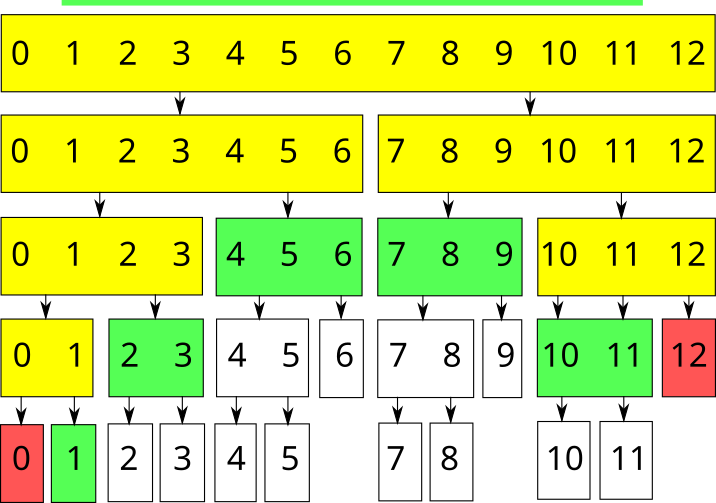

А запрос модификации 4-го элемента:
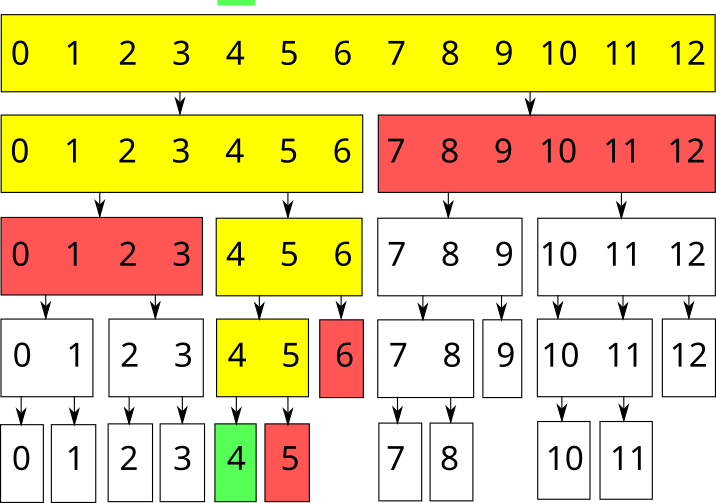


## Реализация дерева отрезков для поиска суммы

Полное бинарное дерево представляем, как и, например, кучу, (как?)

...

...

...

...

...

...

...

...

...

...

с помощью массива и формул перехода $l=2v$ и $r=2v+1$. Для предотвращения всех возможных переполнений размер дерева отрезков для массива из $n$ элементов принимают равным $4n$.

In [ ]:
def build_tree(a):
    n = len(a)
    tree = {}
    for i in range(n):
        tree[n + i] = a[i]
    for i in range(n - 1, 0, -1):
        tree[i] = tree[2 * i] + tree[2 * i + 1]
    return tree

def sum_tree(tree, l, r):
    _sum = 0
    l += n
    r += n
    while l < r:
        if (l & 1) > 0:
            _sum += tree[l]
            l += 1
        if (r & 1) > 0:
            r -= 1
            _sum += tree[r]
        l = l // 2
        r = r // 2
    return _s

# Задачи

1. Реализуйте структуру данных для эффективного вычисления максимумов подряд идущих элементов массива.

    Входные данные:
    
    В первой строке вводится одно натуральное число N (1 ≤ N ≤ 100000) — количество чисел в массиве.
    Во второй строке вводятся N чисел от 1 до 100000 — элементы массива.
    В третьей строке вводится одно натуральное число K (1 ≤ K ≤ 30000) — количество запросов на вычисление максимума.

    В следующих K строках вводится по два числа — номера левого и правого элементов отрезка массива (считается, что элементы массива нумеруются с единицы).

    Выходные данные:
    
    Для каждого запроса выведите значение максимального элемента на указанном отрезке массива. Числа выводите в одну строку через пробел.
    
2. Реализуйте структуру данных для эффективного вычисления НОД нескольких подряд идущих элементов массива.

    Входные данные:
    
    В первой строке вводится одно натуральное число N (1 ≤ N ≤ 100000) — количество чисел в массиве.
    Во второй строке вводятся N чисел от 1 до 100000 — элементы массива.
    В третьей строке вводится одно натуральное число K (1 ≤ K ≤ 30000) — количество запросов на вычисление НОД.
    В следующих K строках вводится по два числа — номера левого и правого элементов отрезка массива (считается, что элементы массива нумеруются с единицы).'

    Выходные данные:
    
    Для каждого запроса выведите НОД всех чисел соответствующего участка массива. Числа выводите в одну строку через пробел.

3. Реализуйте структуру данных для эффективного вычисления индекса k-го слева нулевого элемента в отрезке массива.

    Входные данные
    
    В первой строке вводится одно натуральное число N (1 ≤ N ≤ 100000) — количество чисел в массиве.
    Во второй строке вводятся N чисел от 0 до 100000 — элементы массива.
    В третьей строке вводится одно натуральное число M (1 ≤ M ≤ 30000) — количество запросов на вычисление количества нулей.
    В следующих M строках вводится по три числа — номера левого и правого элементов отрезка массива (считается, что элементы массива нумеруются с единицы) и число k (1 ≤ k ≤ N).

    Выходные данные
    
    Для каждого запроса выведите индекс элемента массива, который является k-м слева нулевым элементом на соответствующем участке массива. Числа выводите в одну строку через пробел.

## Задача 1

In [ ]:
n = int(input())
a = list(map(int, input().split()))
k = int(input())

s = 1
while s < n:
    s *= 2
tree = [0] * (2 * s)

for i in range(n):
    tree[s + i] = a[i]
for i in range(n, s):
    tree[s + i] = -(10**9)

for i in range(s - 1, 0, -1):
    tree[i] = max(tree[2 * i], tree[2 * i + 1])


def query(lf, r):
    lf += s
    r += s
    res = -(10**9)
    while lf < r:
        if lf % 2 == 1:
            res = max(res, tree[lf])
            lf += 1
        if r % 2 == 1:
            r -= 1
            res = max(res, tree[r])
        lf //= 2
        r //= 2
    return res


resl = []
for _ in range(k):
    left, right = map(int, input().split())
    res = query(left - 1, right)
    resl.append(str(res))

print(" ".join(resl))


## Задача 2

In [ ]:
import math

n = int(input())
a = list(map(int, input().split()))
k = int(input())

s = 1
while s < n:
    s *= 2
tree = [0] * (2 * s)

for i in range(n):
    tree[s + i] = a[i]
for i in range(n, s):
    tree[s + i] = 0

for i in range(s - 1, 0, -1):
    tree[i] = math.gcd(tree[2 * i], tree[2 * i + 1])


def query(lf, r):
    lf += s
    r += s
    res = 0
    while lf < r:
        if lf % 2 == 1:
            res = math.gcd(res, tree[lf])
            lf += 1
        if r % 2 == 1:
            r -= 1
            res = math.gcd(res, tree[r])
        lf //= 2
        r //= 2
    return res


resl = []
for _ in range(k):
    left, right = map(int, input().split())
    res = query(left - 1, right)
    resl.append(str(res))

print(" ".join(resl))


## Задача 3

In [ ]:
n = int(input())
a = list(map(int, input().split()))
m = int(input())

s = 1
while s < n:
    s *= 2
tree = [0] * (2 * s)

for i in range(n):
    tree[s + i] = 1 if a[i] == 0 else 0
for i in range(n, s):
    tree[s + i] = 0

for i in range(s - 1, 0, -1):
    tree[i] = tree[2 * i] + tree[2 * i + 1]


def fk(lf, r, k):
    lf += s
    r += s
    pos = lf
    cnt = 0

    while lf < r:
        if lf % 2 == 1:
            if cnt + tree[lf] >= k:
                break
            cnt += tree[lf]
            lf += 1
        if r % 2 == 1:
            r -= 1
            if cnt + tree[r] >= k:
                lf = r
                break
        lf //= 2
        r //= 2

    if lf >= r:
        return -1

    while lf < s:
        if cnt + tree[2 * lf] >= k:
            lf = 2 * lf
        else:
            cnt += tree[2 * lf]
            lf = 2 * lf + 1

    return lf - s + 1


resl = []
for _ in range(m):
    left, right, k = map(int, input().split())
    res = fk(left - 1, right, k)
    resl.append(str(res))

print(" ".join(resl))
